<a href="https://colab.research.google.com/github/spandan005/Lab_Kmeans_clustering-Spandan-Neupane/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
# Step 1: Load data (from CSV or use custom data)
csv_file = "income.csv"

In [3]:
if os.path.exists(csv_file):
    print("Loading data from CSV...")
    df = pd.read_csv(csv_file)
else:
    print("CSV not found. Using custom hardcoded data...")
    data_dict = {
        'Name': ['Spandan', 'Sushant', 'jhyape', 'Rishav', 'Suraj', 'Prashows', 'Sananda', 'Pawan', 'Samay', 'Rana'],
        'Age': [25, 45, 35, 23, 52, 48, 33, 28, 60, 40],
        'Income($)': [50000, 80000, 62000, 48000, 90000, 85000, 60000, 52000, 95000, 70000]
    }
    df = pd.DataFrame(data_dict)


CSV not found. Using custom hardcoded data...


In [4]:
# Extract features
data = df[['Age', 'Income($)']].values

In [5]:
# Step 2: Set number of clusters
k = 3
max_iters = 100

In [6]:
# Step 3: Initialize centroids randomly
random.seed(42)
initial_centroids = data[random.sample(range(len(data)), k)]

In [7]:
# Step 4: Euclidean distance function
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [8]:
# Step 5: K-means loop
centroids = initial_centroids
for iteration in range(max_iters):
    # Assignment step
    clusters = [[] for _ in range(k)]
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Save previous centroids
    old_centroids = centroids.copy()

    # Update centroids
    centroids = [
        np.mean(cluster, axis=0) if cluster else old_centroids[i]
        for i, cluster in enumerate(clusters)
    ]

    # Check for convergence
    converged = np.all([np.allclose(old_centroids[i], centroids[i]) for i in range(k)])
    if converged:
        print(f"Converged at iteration {iteration + 1}")
        break

Converged at iteration 2


In [9]:
# Step 6: Assign final cluster labels
labels = []
for point in data:
    distances = [euclidean(point, centroid) for centroid in centroids]
    labels.append(np.argmin(distances))


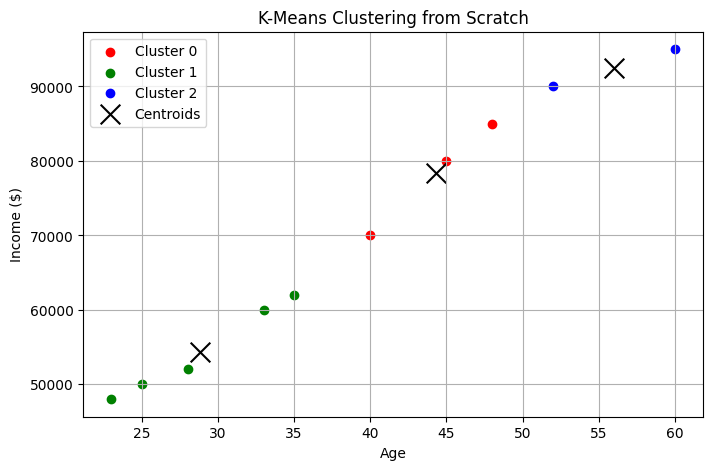

In [10]:
# Step 7: Plot
df['Cluster'] = labels
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Age'], cluster_points['Income($)'], color=colors[i], label=f'Cluster {i}')
plt.scatter(*zip(*centroids), color='black', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('K-Means Clustering from Scratch')
plt.legend()
plt.grid(True)
plt.show()